## 검색어 입력을 통한 네이버 블로그 정보 크롤링
- 검색 정보에 대한 제목/세부내용 크롤링
- 크롤링 결과 txt 파일로 저장
- 불용어 처리 => 정규식 표현

In [31]:
#!pip install rc

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
from urllib.parse import quote
import requests
import time
import pandas as pd
import re

In [2]:
## url 생성
def sch_url(schtext, spage=1):
    url = "https://section.blog.naver.com/Search/Post.naver?"
    url = url + "pageNo=" +str(spage)
    url = url + "&rangeType=ALL&orderBy=sim&keyword=" + quote(schtext)
    #print(url)
    
    return url

In [3]:
schtext="국내 여행"  #input("검색어 입력:")
url=sch_url(schtext, 2)
print(url)

https://section.blog.naver.com/Search/Post.naver?pageNo=2&rangeType=ALL&orderBy=sim&keyword=%EA%B5%AD%EB%82%B4%20%EC%97%AC%ED%96%89


In [8]:
driver = webdriver.Chrome("../chromedriver")
driver.get(url)
time.sleep(2)

html = driver.page_source
soup = bs(html, "html.parser")
a_soup = soup.find_all("a", class_="desc_inner")

url_lst=[]
for a in a_soup:
    url_lst.append(a["href"])

url_lst


/var/folders/ht/f6ymsczd4fs5mmyzkxh60md00000gn/T/ipykernel_93656/1870795434.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../chromedriver")


['https://blog.naver.com/lhhljw/222676428956',
 'https://blog.naver.com/junhyuk_abba/222671368847',
 'https://blog.naver.com/jbm993/222620235123',
 'https://blog.naver.com/anndam/222666621497',
 'https://blog.naver.com/teddyjun/222674908827',
 'https://blog.naver.com/tcacyc/222647764582',
 'https://blog.naver.com/doal722/222680797963']

In [9]:
for link in url_lst:
    #driver.get(link)
    #time.sleep(1)
    
    html = requests.get(link)
    soup = bs(html.content, "html.parser")
    urlNew = "http://blog.naver.com" + soup.find("iframe", id="mainFrame")["src"]

    html = requests.get(urlNew)
    soup = bs(html.text, "html.parser")
    
    #print(soup.find("div", class_="pcol1").text)
    #print(soup.find("div", class_="se-main-container").text)
    
              
    #driver.switch_to.frame("mainFrame")

In [10]:
for link in url_lst:
    driver.get(link)
    time.sleep(1)
    
    driver.switch_to.frame("mainFrame") # iframe 활성화
    html = driver.page_source
    soup = bs(html, "html.parser")
    
    #print(soup.find("div", class_="pcol1").text)
    #print(soup.find("div", class_="se-main-container").text)
driver.quit()

### [미션] 블로그에서 1페이지에서 10페이지까지 블로그 내용 가져오기
정규식 표현(위키독스-점프투파이썬-"07-2" 참조)
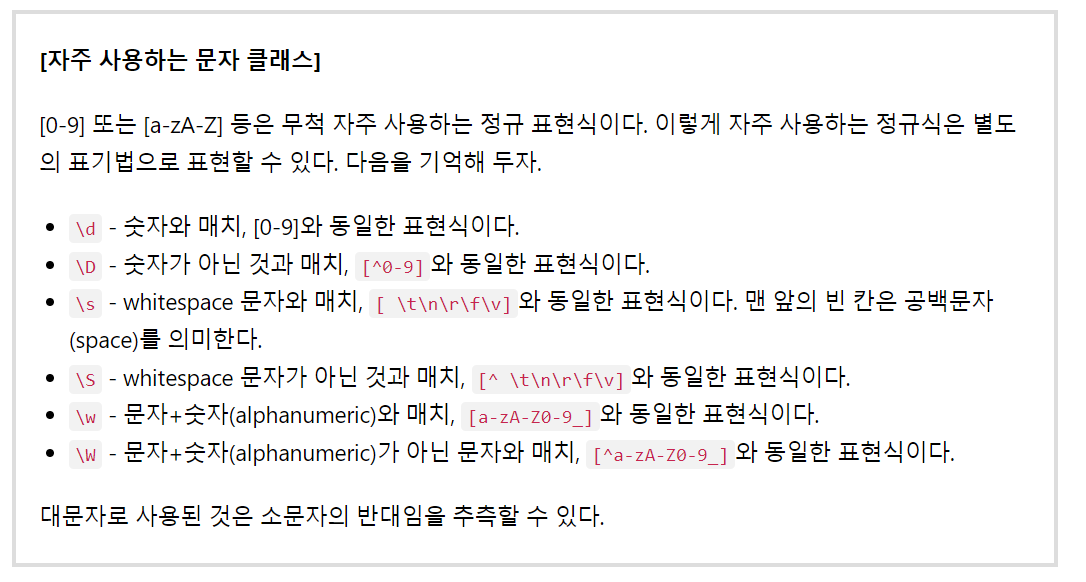

In [11]:
## url 생성
def sch_url2(schtext, spage=1, epage=5):
    url_lst=[]
    for i in range(spage, epage+1):
        url = "https://section.blog.naver.com/Search/Post.naver?"
        url = url + "pageNo=" +str(i)
        url = url + "&rangeType=ALL&orderBy=sim&keyword=" + quote(schtext)
        #print(url)
        
        driver = webdriver.Chrome("../chromedriver")
        driver.get(url)
        time.sleep(2)

        html = driver.page_source
        soup = bs(html, "html.parser")
        title_soup=soup.find_all("span", class_="title")
        a_soup = soup.find_all("a", class_="desc_inner")

        for t, a in zip(title_soup, a_soup):
            url_lst.append([t.text, a["href"]])
    
    return url_lst

In [12]:
def url_text(links):
    txt_lst=[]
    for link in url_lst:
        html = requests.get(link[1])
        soup = bs(html.content, "html.parser")
        urlNew = "http://blog.naver.com" + soup.find("iframe", id="mainFrame")["src"]

        html = requests.get(urlNew)
        soup = bs(html.text, "html.parser")
        try:
            bodytxt=soup.find("div", class_="se-main-container").text
        except:
            bodytxt=soup.find('div', id="postViewArea").text
            #print(link[1])
            
        # 정규식 표현을 이용한 데이터 정리
        bodytxt = re.sub('[^0-9a-zA-Z가-힣 ]', "", bodytxt)
        
        txt_lst.append([link[0],bodytxt])
        
    return txt_lst
    

In [13]:
schtext="국내 여행"

url_lst=sch_url2(schtext, 1, 3)
df_lst=url_text(url_lst)
df=pd.DataFrame(df_lst, columns=["제목", "내용"])
df

/var/folders/ht/f6ymsczd4fs5mmyzkxh60md00000gn/T/ipykernel_93656/2864065916.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../chromedriver")


,제목,내용
0,3월 가볼만한곳 국내여행 용평 발왕산 케이블카 스카이워크,3월 가볼만한곳 국내 여행 용평 발왕산 케이블카 스카이워크지난 폭설 소식 때 상고대...
1,국내 여행지 추천 여수 오동도 볼거리 여수동백꽃,국내 여행지 추천 여수 오동도 볼거리 여수동백꽃 글 사진 그루터기 남도 곳곳에...
2,국내여행 임진각 평화누리캠핑장 다녀왔어요,해외여행을 선뜻 떠나지 못하는 현상황에 저와 같이 지치신 분들이 많으실거예요 그 영...
3,국내 여행 고성 백촌막국수 웨이팅 없이!,국내 여행 맛있는 음식이빠질 수 없죠 고성여행 갔다오는 길 문득 길가에 있는막국수 ...
4,부산여행 2박3일 코스 볼거리 국내 여행지 추천,가볼만한 국내 여행 추천 부산에서 2박3일 안녕하세요 여행블로거 은날이에요 대...
5,국내여행안내사 과목별 집중력 높인 학습!,국내여행안내사 과목별 집중력 높인 학습저는 역사를 참 좋아해요 특히 한국사 과목에 ...
6,2월 국내여행지 추천 경상도여행 남해 독일마을,2월 국내여행지 추천 경상도여행 남해 독일마을 글사진 초록바다 최양훈 입춘이 지나고...
7,여수 1박2일 여행 - 1DAY (엄마랑 언니랑 국내여행!! ),여수여행 1박2일여수 여수 국내여행 1박2일국내여행지추천 엄말랑언니랑 엄마랑여수 엄...
8,매화 개화시기에 맞춰 혼자 국내 여행 봄꽃 구경하기,매화 개화시기에 맞춰 혼자 국내 여행 봄꽃 구경하기 또 다시 봄은 왔지만 여전히 ...
9,강릉 중앙시장 먹거리 겨울 국내여행,강릉 중앙시장 먹거리 겨울 국내여행 국내여행 떠난 강릉 중앙시장 먹거리 여행겨울 국...
